# Intel Distribution of OpenVINO

This is a brief tutorial to get a quick overwiew of 

- Intel Distribution OpenVINO Toolkit
- OpenVINO Model Zoo & Downloader
- Using Model Optimizer
- Running Demo Applications 
- Using Inference Engine API

## What is Intel(R) Distribution of OpenVINO(TM)

Intel Distribution of OpenVINO, short for Open Visual Inference and Neural Network Optimization toolkit, delivers a set of software packages and scripts to speed up Deep Learning application development and deployment process.  

Intel Distribution of OpenVINO's main purpose is to optimize inference, prediction process of Deep Learning models at the Edge Computing device on Intel Hardware.

Note that, Intel Distribution of OpenVINO do not help to train Deep Learning models.

Following software tools and libraries is delivered with OpenVINO installation. 

- OpenCV
- OpenVX
- Intel Media SDK
- Model Downloader
- Model Optimizer
- Inference Engine

## Quick Intro

Below is some helpful information for a quick start to OpenVINO.

Getting started URL helps you to install and start using OpenVINO toolkit on your own development environment. https://software.intel.com/en-us/openvino-toolkit/documentation/get-started . You can follow installation instructions for Linux and Windows.

Intel OpenVINO helps you to choose between existing Hardware (CPU, GPU, MYRIAD, FPGA) to run inference process on the requested hardware. All inference algorithms have been heavily optimized for each hardware platform with corresponding software library. CPU algorithms have been optimized using Intel(R) Math Kernel Library - DNN and GPU operations have been optimized using Intel's OpenCL Library and so on. 

- During the installation process, do not skip the dependency installation parts, there are multiple dependencies which are not delivered with the installation. 

In Linux installation OpenCL library, python packages and additional software libraries need to be installed to quickly start with OpenVINO. Please do not skip the dependency installation parts when you get started. 

- https://software.intel.com/en-us/articles/OpenVINO-Install-Linux

Windows installation process requires additional steps to be completed: Visual Studio Builder installation for CMake builds, paths need to be correctly set and so on.

- https://software.intel.com/en-us/articles/OpenVINO-Install-Windows 

Intel OpenVINO not only provides software development kits, but also add additional tools to download popular open source Deep Learning models and Intel's own deep learning models to fasten development and deployment of Deep Learning applications. 

- **Model Downloader** is being used to download popular Deep Learning models developed with Caffe, Tensorflow, MxNet, ONNX and Kaldi. Intel models are downloaded during installation and can be easily used. In below sections we will see how they are being used.


- **Model Optimizer** is being used to convert frozen models from Caffe, Tensorflow, MxNet, ONNX and Kaldi to Intel OpenVINO's IR files (.xml and .bin) to develop with them. Model Optimizer also provides couple more steps to additional configurations of the models. 

## Opensource OpenVINO Toolkit

OpenVINO is being integrated to OpenCV project. Below URL is the main page for the open-source project. 

- https://01.org/openvinotoolkit 

Inference Engine and Model Optimizer are being maintained under DLDT project of OpenCV repository. 

- https://github.com/opencv/dldt 

Model Downloader and Intel Models are begin maintained under Open Model Zoo repository. Couple of populat Intel Model's (Plate Recognition) can be retrained using the scripts maintained here and also other frozen models can also be accesed from the below URL.

- https://github.com/opencv/open_model_zoo 

Finally, as a complementary for Open Model Zoo, training toolbox is also helpful to retrain couple of popular intel models, this is something under heavy development. 

- https://github.com/opencv/training_toolbox_tensorflow 

# Intel(TM) Distribution of OpenVINO(TM) Demos

At this part, we will run the existing demos to make a quick introduction to OpenVINO then, we will follow-up some more details with Inference Engine API use cases.

Let's dig into demos now, OpenVINO demo's has been placed under `/opt/intel/computer_vision_sdk/deployment_tools/demo` folder. These demos are the start points OpenVINO, they initially checks for dependencies and build the samples. Therefore, security_barrier and classification demos are the best path to start using OpenVINO. 

Below commands helps you to run the samples.

**NOTE: Outputs can change according to used hardware. **

Open a new terminal (ctrl+alt+t) & copy commands and analyze the outputs respectively. 

#### 1. Setup Environment Variables

```bash
source /opt/intel/computer_vision_sdk/bin/setupvars.sh
```

**Output** 

```bash
[setupvars.sh] OpenVINO environment initialized
```

#### 2. Go to Demo directory.

```bash
cd /opt/intel/computer_vision_sdk/deployment_tools/demo
```

#### 3. Run Classification Demo Script

```bash
./demo_squeezenet_download_convert_run.sh
```

**OUTPUT** 

Output at this level shows a classification example. Demo script first downloads the squeezenet1.1 Caffe model and then converts it to IR Files to run the `classification_sample`. 

At the end of the output we see output of classification of the below image. Image not shown, it is here to show what image it did tried to classify. 

![Car](images/car.png) 


```bash
###################################################

Run Inference Engine classification sample

Run ./classification_sample -d CPU -i /opt/intel/computer_vision_sdk/deployment_tools/demo/car.png -m /home/intel/openvino_models/ir/FP32//classification/squeezenet/1.1/caffe/squeezenet1.1.xml 

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Files were added: 1
[ INFO ]     /opt/intel/computer_vision_sdk/deployment_tools/demo/car.png
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. lnx_20181004
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files:
	/home/intel/openvino_models/ir/FP32//classification/squeezenet/1.1/caffe/squeezenet1.1.xml
	/home/intel/openvino_models/ir/FP32//classification/squeezenet/1.1/caffe/squeezenet1.1.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image is resized from (787, 259) to (227, 227)
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference (1 iterations)
[ INFO ] Processing output blobs

Top 10 results:

Image /opt/intel/computer_vision_sdk/deployment_tools/demo/car.png

817 0.8363345 label sports car, sport car
511 0.0946488 label convertible
479 0.0419131 label car wheel
751 0.0091071 label racer, race car, racing car
436 0.0068161 label beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
656 0.0037564 label minivan
586 0.0025741 label half track
717 0.0016069 label pickup, pickup truck
864 0.0012027 label tow truck, tow car, wrecker
581 0.0005882 label grille, radiator grille


total inference time: 6.2629441
Average running time of one iteration: 6.2629441 ms

Throughput: 159.6693164 FPS

[ INFO ] Execution successful


###################################################

Demo completed successfully.
```

#### 4. Now, we can go over the mentioned steps and understand the actual workflow. Therefore, we first use Model Downloader script to see how Model Downloader works and downloads `squeezenet 1.1` Caffe model (.prototxt and .caffemodel files)

```bash
cd /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/
```

#### 5. Let's see available models to download

```bash
python3 /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/downloader.py --print_all
```

**Output**

```bash
========== All available topologies ==========

densenet-121
densenet-161
densenet-169
densenet-201
squeezenet1.0
squeezenet1.1
mtcnn-p
mtcnn-r
mtcnn-o
mobilenet-ssd
vgg19
vgg16
ssd512
ssd300
inception-resnet-v2
dilation
googlenet-v1
googlenet-v2
googlenet-v4
alexnet
ssd_mobilenet_v2_coco
resnet-50
resnet-101
resnet-152
googlenet-v3
se-inception
se-resnet-101
se-resnet-152
se-resnet-50
se-resnext-50
se-resnext-101
Sphereface
```

#### 6. Download SqueezeNet 1.1

**Note** If there is no internet connection you can skip this step, model already downloaded. In following sections, we will download all models under `/home/intel/openvino_models` folder. 

```bash
sudo -E python3 downloader.py --name squeezenet1.1
```

**Output**

We just got the squeezenet model to current directory. 

```bash
###############|| Start downloading models ||###############

...100%, 9 KB, 19679 KB/s, 0 seconds passed ========= squeezenet1.1.prototxt ====> /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.prototxt

###############|| Start downloading weights ||###############

...100%, 4834 KB, 2023 KB/s, 2 seconds passed ========= squeezenet1.1.caffemodel ====> /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel

###############|| Start downloading topologies in tarballs ||###############


###############|| Post processing ||###############

========= Changing input dimensions in squeezenet1.1.prototxt =========
```


#### 7. By default, model has been downloaded to current directory, output directory can be provided excplicitly too. Therefore, we now use Model Optimizer to create IR files to be used by our example software. .

```bash
ls /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe

sudo -E /opt/intel/computer_vision_sdk/deployment_tools/model_optimizer/mo.py --input_model /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
```

At this stage, we convert Caffe Model to OpenVINO IR. Without any further configurations so all the information is inherited from the input model and by defatult FP data type is FP32. 

**Output**
```bash
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/opt/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
	- Path for generated IR: 	/opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/model_downloader/.
	- IR output name: 	squeezenet1.1
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/opt/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.prototxt
	- Path to CustomLayersMapping.xml: 	Default
	- Path to a mean file: 	Not specified
	- Offsets for a mean file: 	Not specified
Model Optimizer version: 	1.5.12.49d067a0

[ SUCCESS ] Generated IR model.
[ SUCCESS ] XML file: /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/model_downloader/./squeezenet1.1.xml
[ SUCCESS ] BIN file: /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/model_downloader/./squeezenet1.1.bin
[ SUCCESS ] Total execution time: 2.01 seconds.

```

#### 8. By the first run of the script, `classification_sample` application have been built under the `<home_dir>/inference_engine_samples/intel64/Release`, we wil navigate to directory to run `classification_sample`. 

```bash
cd /home/intel/inference_engine_samples/intel64/Release/
```

#### 9. Now, we access to `classification_sample` binary and can use the binary to run classification sample on the sample image `car.png` so we first copy the image/model & labels into directory (or skip and provide full path) 

![Sample Car](images/car.png)

```bash
cp /opt/intel/computer_vision_sdk/deployment_tools/demo/car.png . &&
cp /opt/intel/computer_vision_sdk/deployment_tools/demo/squeezenet1.1.labels . &&
cp /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/./squeezenet1.1.xml . &&
cp /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/./squeezenet1.1.bin . 
./classification_sample -i car.png -m squeezenet1.1.xml –d CPU
```

**Output**

```bash
[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Files were added: 1
[ INFO ]     car.png
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. lnx_20181004
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files:
	squeezenet1.1.xml
	squeezenet1.1.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image is resized from (787, 259) to (227, 227)
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference (1 iterations)
[ INFO ] Processing output blobs

Top 10 results:

Image car.png

817 0.8363345 label sports car, sport car
511 0.0946488 label convertible
479 0.0419131 label car wheel
751 0.0091071 label racer, race car, racing car
436 0.0068161 label beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
656 0.0037564 label minivan
586 0.0025741 label half track
717 0.0016069 label pickup, pickup truck
864 0.0012027 label tow truck, tow car, wrecker
581 0.0005882 label grille, radiator grille


total inference time: 5.4428489
Average running time of one iteration: 5.4428489 ms

Throughput: 183.7273125 FPS
```

#### 10. We know how to use the sample application, you can see that targeted hardware device is CPU. Now, we can see how we can utilize GPU. Below sample uses FP32 IR files to run classification.

```bash
./classification_sample -i car.png -m squeezenet1.1.xml -d GPU
```

As you can realize, `clDNNPlugin` used compared to `MKLDNNPlugin`. (if it is not clDNN re-run the application) and got a slight improvement on the performance compared to CPU.

**Output**

```bash
[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Files were added: 1
[ INFO ]     car.png
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. 19154
	Description ....... clDNNPlugin
[ INFO ] Loading network files:
	squeezenet1.1.xml
	squeezenet1.1.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image is resized from (787, 259) to (227, 227)
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference (1 iterations)
[ INFO ] Processing output blobs

Top 10 results:

Image car.png

817 0.8363329 label sports car, sport car
511 0.0946493 label convertible
479 0.0419136 label car wheel
751 0.0091072 label racer, race car, racing car
436 0.0068162 label beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
656 0.0037564 label minivan
586 0.0025741 label half track
717 0.0016069 label pickup, pickup truck
864 0.0012027 label tow truck, tow car, wrecker
581 0.0005882 label grille, radiator grille


total inference time: 5.8356822
Average running time of one iteration: 5.8356822 ms

Throughput: 171.3595727 FPS

```


#### 11. Let's use Model Optimizer to change data type to FP16 , where GPU runs faster.

```bash
sudo -E /opt/intel/computer_vision_sdk/deployment_tools/model_optimizer/mo.py --input_model /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel --data_type FP16
 ```

Model outputs written directly to current directory you are in, so it overwrite the existing FP32 IR files. 

**OUTPUT**

```bash
Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/opt/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel
	- Path for generated IR: 	/home/intel/inference_engine_samples/intel64/Release/.
	- IR output name: 	squeezenet1.1
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	Not specified
	- Scale values: 	Not specified
	- Scale factor: 	Not specified
	**- Precision of IR: 	FP16**
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/opt/intel/computer_vision_sdk/deployment_tools/model_downloader/classification/squeezenet/1.1/caffe/squeezenet1.1.prototxt
	- Path to CustomLayersMapping.xml: 	Default
	- Path to a mean file: 	Not specified
	- Offsets for a mean file: 	Not specified
Model Optimizer version: 	1.5.12.49d067a0

[ SUCCESS ] Generated IR model.
[ SUCCESS ] XML file: /home/intel/inference_engine_samples/intel64/Release/./squeezenet1.1.xml
[ SUCCESS ] BIN file: /home/intel/inference_engine_samples/intel64/Release/./squeezenet1.1.bin
[ SUCCESS ] Total execution time: 1.07 seconds.
```
 
#### 12. Let's try with FP16 and see the difference
```bash
./classification_sample -i car.png -m squeezenet1.1.xml -d GPU
```

```bash
[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Files were added: 1
[ INFO ]     car.png
[ INFO ] Loading plugin

	API version ............ 1.5
	Build .................. 19154
	Description ....... clDNNPlugin
[ INFO ] Loading network files:
	squeezenet1.1.xml
	squeezenet1.1.bin
[ INFO ] Preparing input blobs
[ WARNING ] Image is resized from (787, 259) to (227, 227)
[ INFO ] Batch size is 1
[ INFO ] Preparing output blobs
[ INFO ] Loading model to the plugin
[ INFO ] Starting inference (1 iterations)
[ INFO ] Processing output blobs

Top 10 results:

Image car.png

817 0.8457031 label sports car, sport car
511 0.0891113 label convertible
479 0.0395508 label car wheel
751 0.0085678 label racer, race car, racing car
436 0.0064659 label beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon
656 0.0034027 label minivan
586 0.0024509 label half track
717 0.0016336 label pickup, pickup truck
864 0.0010891 label tow truck, tow car, wrecker
581 0.0005560 label grille, radiator grille


total inference time: 4.4890200
Average running time of one iteration: 4.4890200 ms

Throughput: 222.7657718 FPS

[ INFO ] Execution successful
```

There is a significant change between FP32 and FP16. Total inference time was 5.8 and now it is 4.48 ms. 

#### 13. We can run the next demo and finalize this session. Second demo is using Intel Licence Plate Recognition (LPR) Model for Chineese Plates as below and called security_barrier_camera

Open a new terminal (ctrl+alt+t) and run below...

```bash
cd /opt/intel/computer_vision_sdk/deployment_tools/demo
./demo_security_barrier_camera.sh
```

**Output**

```bash
###################################################

Run Inference Engine security_barrier_camera demo

Run ./security_barrier_camera_demo -d CPU -d_va CPU -d_lpr CPU -i /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/demo/car_1.bmp -m /opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/intel_models/vehicle-license-plate-detection-barrier-0106/FP32/vehicle-license-plate-detection-barrier-0106.xml -m_va /opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/intel_models/vehicle-attributes-recognition-barrier-0039/FP32/vehicle-attributes-recognition-barrier-0039.xml -m_lpr /opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/intel_models/license-plate-recognition-barrier-0001/FP32/license-plate-recognition-barrier-0001.xml 

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Capturing video streams from the video files or loading images
[ INFO ] Files were added: 1
[ INFO ]     /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/demo/car_1.bmp
[ INFO ] Number of input image files: 1
[ INFO ] Number of input video files: 0
[ INFO ] Number of input channels:    1
[ INFO ] Loading plugin CPU

	API version ............ 1.5
	Build .................. lnx_20181004
	Description ....... MKLDNNPlugin
[ INFO ] Loading network files for VehicleDetection
[ INFO ] Batch size is forced to  1
[ INFO ] Checking Vehicle Detection inputs
[ INFO ] Checking Vehicle Detection outputs
[ INFO ] Loading Vehicle Detection model to the CPU plugin
[ INFO ] Loading network files for VehicleAttribs
[ INFO ] Batch size is forced to 1 for Vehicle Attribs
[ INFO ] Checking VehicleAttribs inputs
[ INFO ] Checking Vehicle Attribs outputs
[ INFO ] Loading Vehicle Attribs model to the CPU plugin
[ INFO ] Loading network files for Licence Plate Recognition (LPR)
[ INFO ] Batch size is forced to  1 for LPR Network
[ INFO ] Checking LPR Network inputs
[ INFO ] Checking LPR Network outputs
[ INFO ] Loading LPR model to the CPU plugin
[ INFO ] Start inference 

Avarage inference time: 61.2144 ms (16.336 fps)

Total execution time: 32037.6

[ INFO ] Execution successful


###################################################

Demo completed successfully.

```

This example will open a window showing the inference result as below:


Execution Output:

![Sample Car](images/security_camera_demo.png)

### Follow Up

You can see the execution commands from the script outputs. You can change them and try to run with different images, target platroms etc. 

Example, LPR example with all GPU, we will also go over a similar example with multiple models and multiple targets. 

```bash
cd /home/intel/inference_engine_samples/intel64/Release/

./security_barrier_camera_demo -d GPU -d_va GPU -d_lpr GPU -i /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/demo/car_1.bmp -m /opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/intel_models/vehicle-license-plate-detection-barrier-0106/FP32/vehicle-license-plate-detection-barrier-0106.xml -m_va /opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/intel_models/vehicle-attributes-recognition-barrier-0039/FP32/vehicle-attributes-recognition-barrier-0039.xml -m_lpr /opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/intel_models/license-plate-recognition-barrier-0001/FP32/license-plate-recognition-barrier-0001.xml

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Capturing video streams from the video files or loading images
[ INFO ] Files were added: 1
[ INFO ]     /opt/intel/computer_vision_sdk_2018.5.445/deployment_tools/demo/car_1.bmp
[ INFO ] Number of input image files: 1
[ INFO ] Number of input video files: 0
[ INFO ] Number of input channels:    1
[ INFO ] Loading plugin GPU

	API version ............ 1.5
	Build .................. 19154
	Description ....... clDNNPlugin
[ INFO ] Loading network files for VehicleDetection
[ INFO ] Batch size is forced to  1
[ INFO ] Checking Vehicle Detection inputs
[ INFO ] Checking Vehicle Detection outputs
[ INFO ] Loading Vehicle Detection model to the GPU plugin
[ INFO ] Loading network files for VehicleAttribs
[ INFO ] Batch size is forced to 1 for Vehicle Attribs
[ INFO ] Checking VehicleAttribs inputs
[ INFO ] Checking Vehicle Attribs outputs
[ INFO ] Loading Vehicle Attribs model to the GPU plugin
[ INFO ] Loading network files for Licence Plate Recognition (LPR)
[ INFO ] Batch size is forced to  1 for LPR Network
[ INFO ] Checking LPR Network inputs
[ INFO ] Checking LPR Network outputs
[ INFO ] Loading LPR model to the GPU plugin
[ INFO ] Start inference 

Avarage inference time: 27.3022 ms (36.6271 fps)

Total execution time: 11845.8
```

## Model Zoo & Model Downloader

Intel OpenVINO aims to reduce development and deployment process. Therefore, toolkit provides pre-trained models and Model Downloader tool to get publicly available popular open source deep learning models. 

### Model Zoo

Since OpenVINO is become Open Source, below repo is being maintained to keep Intel Model's up-to dates. 

https://github.com/opencv/open_model_zoo

Here is the list of  Intel Models in the repo:

![Intel Models](images/intel_models.png)

Model Downloader is stored under `/opt/intel/computer_vision_sdk/deployment_tools/model_downloader`. Below is the command to list all available models. 

In [1]:
# Here is a list of available models to download with downloader.py script
!python3 /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/downloader.py --print_all

Please choose either "--all" or "--name"
usage: downloader.py [-h] [-c CONFIG] [--name NAME] [--all] [--print_all]
                     [-o OUTPUT_DIR]

optional arguments:
  -h, --help            show this help message and exit
  -c CONFIG, --config CONFIG
                        path to YML configuration file
  --name NAME           names of topologies for downloading with comma
                        separation
  --all                 download all topologies from the configuration file
  --print_all           print all available topologies
  -o OUTPUT_DIR, --output_dir OUTPUT_DIR
                        path where to save topologies

list_topologies.yml - default configuration file

========== All available topologies ==========

densenet-121
densenet-161
densenet-169
densenet-201
squeezenet1.0
squeezenet1.1
mtcnn-p
mtcnn-r
mtcnn-o
mobilenet-ssd
vgg19
vgg16
ssd512
ssd300
inception-resnet-v2
dilation
googlenet-v1
googlenet-v2
googlenet-v4
alexnet
ssd_mobilenet_v2_coco
resnet-50
resn

Let's download an model MobileNet SSD, which we will be using in later sessions for object detection. All demo scripts uses the folder `home/intel/openvino_models` folder. 

Raw models are downloaded to `/home/intel/openvino_models/models` folder automatically. 

Note: If you don't have internet connection you can skip below part because it requires internet connection to download raw model, which is already available. 

In [2]:
# If there is no internet connection, you can get error, don't worry it is already downloaded.
!python3 /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/downloader.py --name mobilenet-ssd -o /home/intel/openvino_models/models


###############|| Start downloading models ||###############

...100%, 28 KB, 107582 KB/s, 0 seconds passed ========= mobilenet-ssd.prototxt ====> /home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.prototxt

###############|| Start downloading weights ||###############

...100%, 22605 KB, 1551 KB/s, 14 seconds passed ========= mobilenet-ssd.caffemodel ====> /home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel

###############|| Start downloading topologies in tarballs ||###############


###############|| Post processing ||###############



Downloading GoogleNet 

```bash

python3 /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/downloader.py --name googlenet-v4 -o /home/intel/openvino_models/models

###############|| Start downloading models ||###############

...100%, 84 KB, 534 KB/s, 0 seconds passed ========= googlenet-v4.prototxt ====> /home/intel/openvino_models/models/classification/googlenet/v4/caffe/googlenet-v4.prototxt

###############|| Start downloading weights ||###############

...100%, 166774 KB, 1625 KB/s, 102 seconds passed ========= googlenet-v4.caffemodel ====> /home/intel/openvino_models/models/classification/googlenet/v4/caffe/googlenet-v4.caffemodel

###############|| Start downloading topologies in tarballs ||###############


###############|| Post processing ||###############
```

Downloading Alexnet 

```bash
python3 /opt/intel/computer_vision_sdk/deployment_tools/model_downloader/downloader.py --name alexnet -o /home/intel/openvino_models/models

###############|| Start downloading models ||###############

...100%, 3 KB, 9855 KB/s, 0 seconds passed ========= alexnet.prototxt ====> /home/intel/openvino_models/models/classification/alexnet/caffe/alexnet.prototxt

###############|| Start downloading weights ||###############

...100%, 238146 KB, 336 KB/s, 707 seconds passed ========= alexnet.caffemodel ====> /home/intel/openvino_models/models/classification/alexnet/caffe/alexnet.caffemodel

###############|| Start downloading topologies in tarballs ||###############


###############|| Post processing ||###############

========= Changing input dimensions in alexnet.prototxt =========
```

# Model Optimizer

Mode Optimizer used to convert and optimize existing models to IR after certain static topological analysis of existing Caffe, Tensorflow, MxNet, ONNX, Kaldi model. 

- Batch Normalisation
- Mean Variance Normalisation
- Horizontal Fusion
- L2 Normalization Pattern
- Leaky ReLU Pattern
- Constant Folding
- Convolutional/Deconvolutional Grouping
- Linear Operation Fusion

See the Modeol Optimizer documentation for detailed explanations of optimizations. 

In below example, we want to convert previously downloaded `mobilenet-ssd` model to IR model both for FP16 and FP32.

As you will see, there is also --scale and --mean_values used for this model conversion. Mobilenet SSD uses RGB images which are scaled to 224x224 and normalized with scale factor 1/256 and substracted mean values 127 before training so we need similar things. 

Model Optimizer can achive these type of optimization during conversion so while working with mobilenet-ssd, you don't need to normalize image. 
- `scale` means : `All input values coming from original network inputs will be divided by this value.`
- `mean_values` means: `Mean values to be used for the input image per channel. Values to be provided in the (R,G,B) or [R,G,B] format.`

In [3]:
# FP 32 Optimization and Convertion
!python3 /opt/intel/computer_vision_sdk/deployment_tools/model_optimizer/mo.py \
--input_model "/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel" \
--output_dir /home/intel/openvino_models/ir/mobilenet-ssd/FP32 --data_type FP32 --scale 256 --mean_values [127,127,127]

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/home/intel/openvino_models/ir/mobilenet-ssd/FP32
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP32
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.prototxt

In [4]:
# FP 16 Optimization and Convertion
!python3 /opt/intel/computer_vision_sdk/deployment_tools/model_optimizer/mo.py \
--input_model "/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel" \
--output_dir /home/intel/openvino_models/ir/mobilenet-ssd/FP16 --data_type FP16 --scale 256 --mean_values [127,127,127]

Model Optimizer arguments:
Common parameters:
	- Path to the Input Model: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel
	- Path for generated IR: 	/home/intel/openvino_models/ir/mobilenet-ssd/FP16
	- IR output name: 	mobilenet-ssd
	- Log level: 	ERROR
	- Batch: 	Not specified, inherited from the model
	- Input layers: 	Not specified, inherited from the model
	- Output layers: 	Not specified, inherited from the model
	- Input shapes: 	Not specified, inherited from the model
	- Mean values: 	[127,127,127]
	- Scale values: 	Not specified
	- Scale factor: 	256.0
	- Precision of IR: 	FP16
	- Enable fusing: 	True
	- Enable grouped convolutions fusing: 	True
	- Move mean values to preprocess section: 	False
	- Reverse input channels: 	False
Caffe specific parameters:
	- Enable resnet optimization: 	True
	- Path to the Input prototxt: 	/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.prototxt

# Inference Engine Python API

At this part, we will give a brief introduction to Inference Engine Python API. Below code will run a basic object detection sample using mobilenet-ssd model. 

In [5]:
# Required Libraries Imported
import sys
import os
import time
import cv2 as cv
import numpy as np
from demoutils import videoHTML,liveQstat, summaryPlot, progressIndicator
from IPython.display import HTML
import matplotlib.pyplot as plt

In [6]:
# See that PYTHONPATH includes Intel CV Python path which includes OpenVINO Python Modules
!echo $PYTHONPATH

/opt/intel//computer_vision_sdk_2018.5.445/python/python3.5:/opt/intel//computer_vision_sdk_2018.5.445/python/python3.5/ubuntu16:/opt/intel//computer_vision_sdk_2018.5.445/deployment_tools/model_optimizer


Now we must select the device used for the inferencing. This is done by loading the appropriate plugin to initialize the specified device and load the extensions library (if specified) provided in the extension/ folder for the device.

The following cell constructs **IEPlugin**:

In [7]:
from openvino.inference_engine import IEPlugin, IENetwork

def createPlugin(target_device, extension_list):
    # Plugin initialization for specified device. We will be targeting CPU initially.
    plugin = IEPlugin(device=target_device)

    # Loading additional exension libraries for the CPU
    if target_device == 'CPU':
        for extension in extension_list:
            plugin.add_cpu_extension('/home/intel/inference_engine_samples/intel64/Release/lib/libcpu_extension.so')

    return plugin

We can import optimized models (weights) from step 1.1 into our neural network using IENetwork. 

**Note** Some models may be incompatible with some target devices. For example, some types of neural network layers are not supported on the CPU. 

In [8]:
def createNetwork(model_xml, model_bin, plugin):
    # Importing network weights from IR models.

    net = IENetwork(model=model_xml, weights=model_bin)

    # Some layers in IR models may be unsupported by some plugins. 
    if "CPU" in plugin.device:
        supported_layers = plugin.get_supported_layers(net)
        not_supported_layers = [l for l in net.layers.keys() if l not in supported_layers]
        if len(not_supported_layers) != 0:
            print("Following layers are not supported by the plugin for specified device {}:\n {}".
                      format(plugin.device, ', '.join(not_supported_layers)))
            print("Please try to specify cpu extensions library path in sample's command line parameters "
                  "using -l or --cpu_extension command line argument")
            return None
    return net

Once we have the plugin and the network, we can load the network into the plugin using **`plugin.load`**.

In [9]:
def loadNetwork(plugin, net):
    # Loading IR model to the plugin.
    exec_net = plugin.load(network=net, num_requests=2)
    
    # Getting the input and outputs of the network
    input_blob = next(iter(net.inputs))
    out_blob = next(iter(net.outputs))
    return exec_net,input_blob,out_blob

Now we are ready to try running the inference workload using the plugin.
First let's load the image using OpenCV.
We will also have to do some shape manipulation to convert the image to a format that is compatible with our network

In [10]:
def preprocessImage(img_path, net, input_blob):
    # Reading the frame from a jpeg file
    frame = cv.imread(img_path)
    
    # Reshaping data
    n, c, h, w = net.inputs[input_blob].shape
    in_frame = cv.resize(frame, (w, h))
    in_frame = in_frame.transpose((2, 0, 1))  # Change data layout from HWC to CHW
    
    return in_frame.reshape((n, c, h, w)),frame

For the inference, we will be running in **async_mode** by using `start_async` method. 
With the async_mode, the inference is started in parallel on either a separate thread or device.
In other words, `start_async` is non-blocking and the main process is free to do any additional processing needed. 

During asynchronous runs, the different images are tracked by an integer `request_id`. 
Because we only have one image to process, we will just use 0.

In [11]:
# For labeling the image
from out_process import placeBoxes


labels_map = {0:'background',1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat',
              9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant',
              17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

# Request id to keep track of
def runInference(device='CPU', 
                 model_xml='/home/intel/openvino_models/ir/mobilenet-ssd/FP32/mobilenet-ssd.xml', 
                 model_bin='/home/intel/openvino_models/ir/mobilenet-ssd/FP32/mobilenet-ssd.bin',
                 image_file='images/car.png',
                 confidence_threshold=0.6):
    
    plugin = createPlugin(target_device=device, extension_list=['/home/intel/inference_engine_samples/intel64/Release/lib/libcpu_extension.so'])
    
    net = createNetwork(model_xml, model_bin, plugin)
    
    exec_net,input_blob,out_blob = loadNetwork(plugin, net)
    
    in_frame,original_frame = preprocessImage(image_file, net, input_blob)
    
    my_request_id=0

    # Starting the inference in async mode, which starts the inference in parallel
    inference_start = time.time()
    exec_net.start_async(request_id=my_request_id, inputs={input_blob: in_frame})
    # ... You can do additional processing or latency masking while we wait ...

    # Blocking wait for a particular request_id
    if exec_net.requests[my_request_id].wait(-1) == 0:
        # getting the result of the network
        res = exec_net.requests[my_request_id].outputs[out_blob]
        inference_end = time.time()
        # Processing the output result and adding labels on the image. Implementation is not shown in the
        #  this notebook; you can find it in object_detection_demo_ssd_async.py
        initial_w = original_frame.shape[1]
        initial_h = original_frame.shape[0]
        
        frame = placeBoxes(res, labels_map, confidence_threshold, original_frame, initial_w, initial_h, False, my_request_id, ((inference_end - inference_start)))
        # We use pyplot because it plays nicer with Jupyter Notebooks
        fig = plt.figure(dpi=300)
        ax = fig.add_subplot(111)
        ax.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB), interpolation='none')
        plt.axis("off")
        plt.show()
    else:
        print("There was an error with the request")
        
    return None

In [12]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 78
model name	: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz
stepping	: 3
microcode	: 0x49
cpu MHz		: 900.081
cache size	: 4096 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 22
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb invpcid_single pti tpr_shadow vnmi flexpriority ept vpid fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid mpx rdseed adx smap clflushopt intel_pt xsaveopt xsavec xgetbv1 xsaves dtherm ida arat pln pts hwp hwp_no

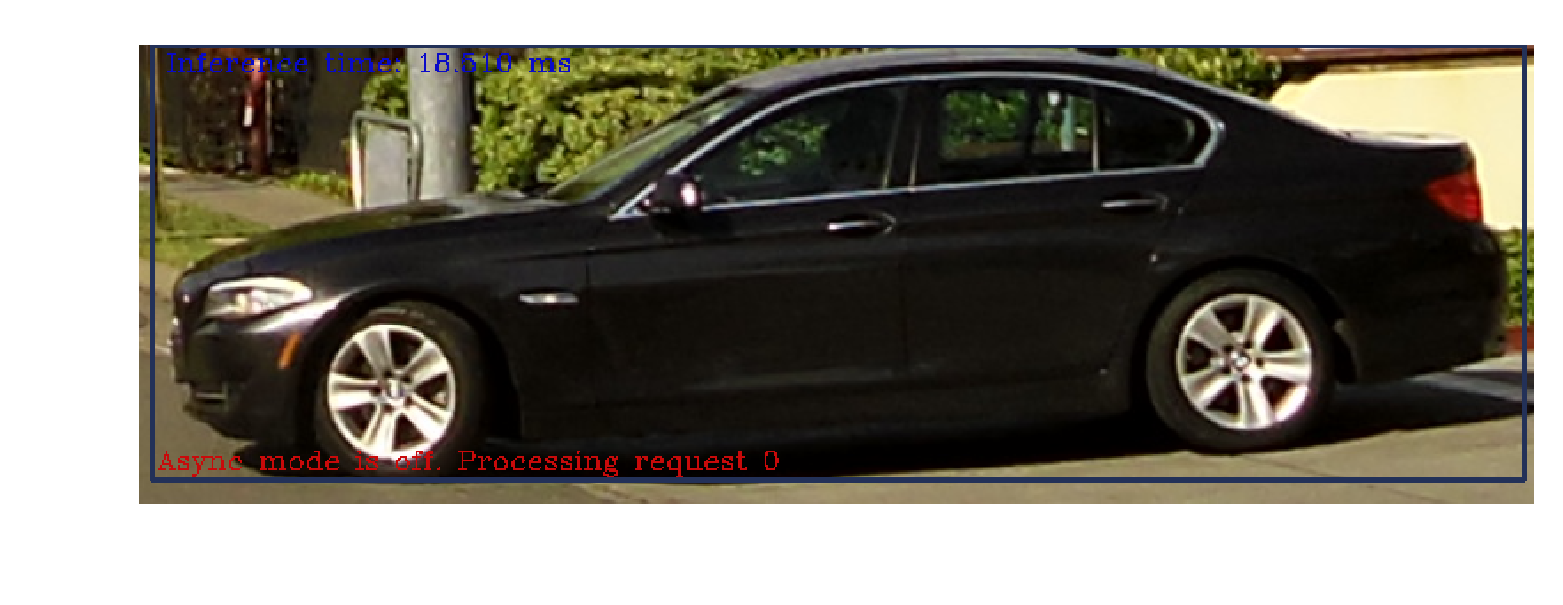

In [13]:
runInference('CPU')

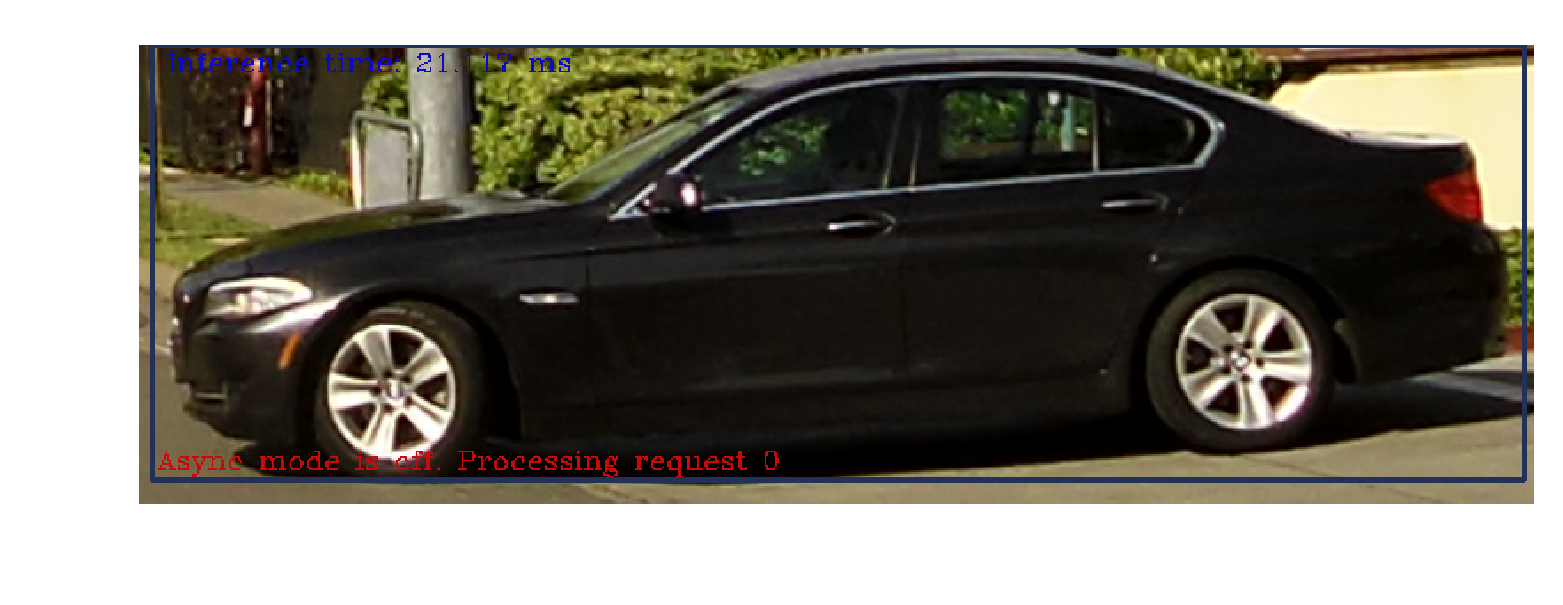

In [14]:
runInference("GPU")

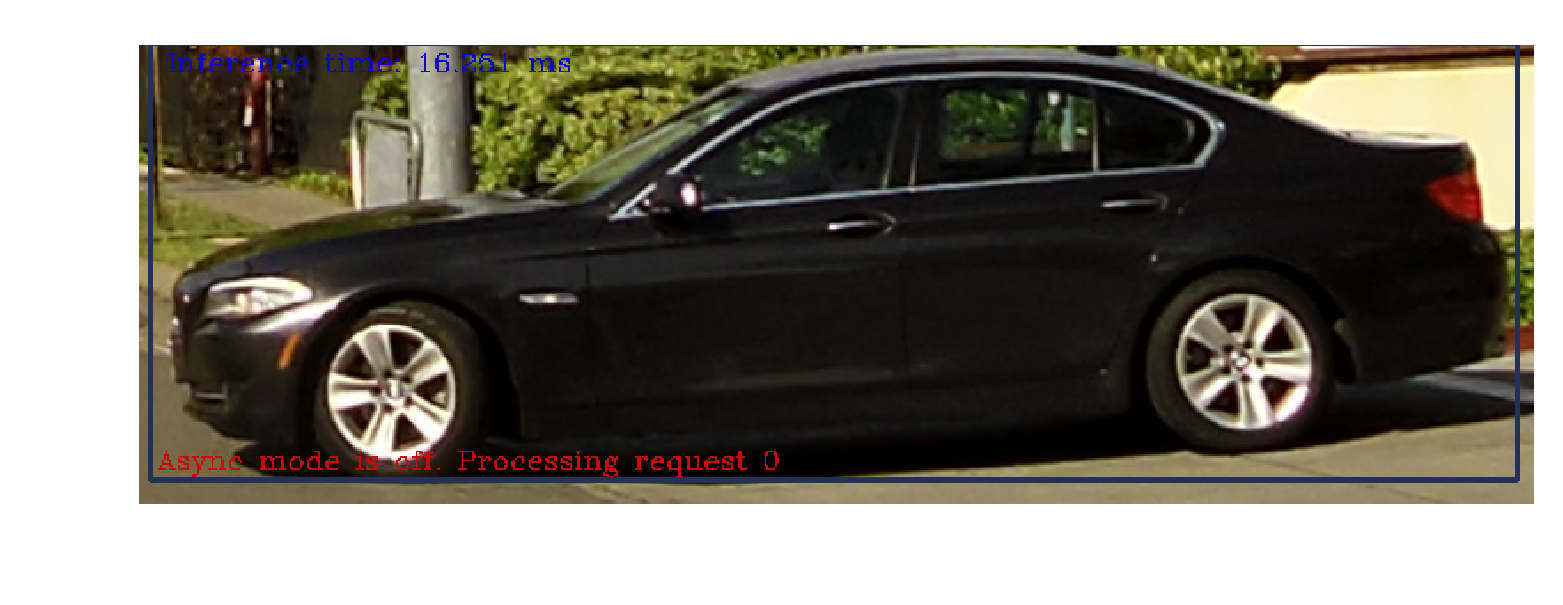

In [15]:
runInference(device='GPU', 
             model_xml='/home/intel/openvino_models/ir/mobilenet-ssd/FP16/mobilenet-ssd.xml', 
             model_bin='/home/intel/openvino_models/ir/mobilenet-ssd/FP16/mobilenet-ssd.bin')

# Run on Intel Neural Compute Stick 2

In [16]:
# Bus 001 Device 013: ID 03e7:2485 indicates NCS2
# if not seen, install via running following commands
!lsusb

Bus 002 Device 001: ID 1d6b:0003 Linux Foundation 3.0 root hub
Bus 001 Device 007: ID 04f2:b446 Chicony Electronics Co., Ltd 
Bus 001 Device 006: ID 04f3:20d6 Elan Microelectronics Corp. 
Bus 001 Device 005: ID 048d:8350 Integrated Technology Express, Inc. 
Bus 001 Device 004: ID 8087:0a2a Intel Corp. 
Bus 001 Device 012: ID 046d:c52e Logitech, Inc. MK260 Wireless Combo Receiver
Bus 001 Device 011: ID 03e7:2485  
Bus 001 Device 001: ID 1d6b:0002 Linux Foundation 2.0 root hub


Note: if you get NCS2 Not Found Error you install NCS2 as below. 
```bash
cat <<EOF > 97-usbboot.rules
SUBSYSTEM=="usb", ATTRS{idProduct}=="2150", ATTRS{idVendor}=="03e7", GROUP="users", MODE="0666", ENV{ID_MM_DEVICE_IGNORE}="1"
SUBSYSTEM=="usb", ATTRS{idProduct}=="2485", ATTRS{idVendor}=="03e7", GROUP="users", MODE="0666", ENV{ID_MM_DEVICE_IGNORE}="1"
SUBSYSTEM=="usb", ATTRS{idProduct}=="f63b", ATTRS{idVendor}=="03e7", GROUP="users", MODE="0666", ENV{ID_MM_DEVICE_IGNORE}="1"
EOF
```

```bash
sudo cp 97-usbboot.rules /etc/udev/rules.d/
sudo udevadm control --reload-rules
sudo udevadm trigger
sudo ldconfig
rm 97-usbboot.rules
```

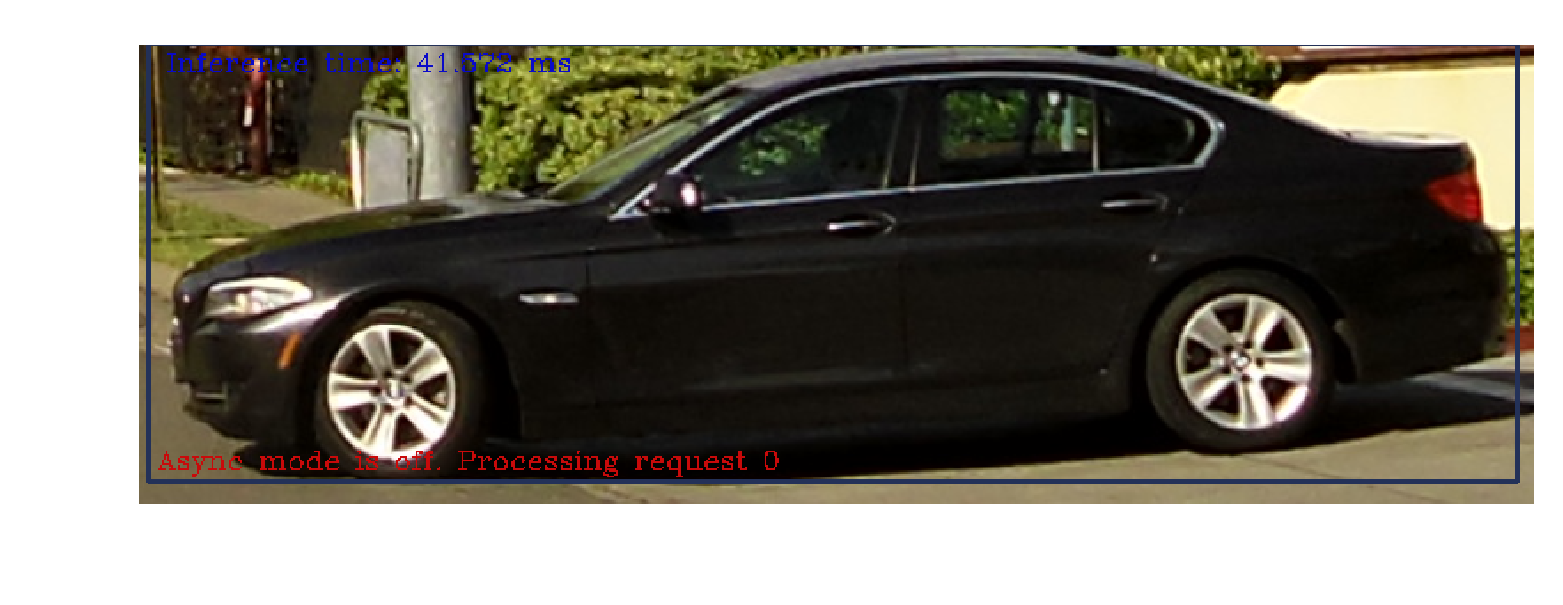

In [17]:
runInference(device='MYRIAD', 
             model_xml='/home/intel/openvino_models/ir/mobilenet-ssd/FP16/mobilenet-ssd.xml', 
             model_bin='/home/intel/openvino_models/ir/mobilenet-ssd/FP16/mobilenet-ssd.bin')